In [1]:
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
np.random.seed(0)
tf.compat.v1.set_random_seed(0)

Building model

In [3]:
#parameters
name = "Lung"

In [4]:
print('dataset name : ', name)

dataset name :  Lung


In [5]:
batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch",
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster",
                    }    
N_celltype_exp_dic = {
    'Lung' : 17,
    'Pancreas': 15,
    'Immune_Human': 16,
    'Human_Retina': 13
}
data_path = "/home/krushna/Documents/Data_integration/SCRNA_Datasets/All_h5ad/"
data_path += name+".h5ad"

came in load_gene
updated hvg
here [16 16 16 ... 10 10 10]
Shape self.data_train: (32472, 2000)
Shape self.data_test: (32472, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2016), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 26), dtype=float32)
inferred check Tensor("Max:0", shape=(), dtype=float32)
entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cluster DRA on DataSet /home/krushna/Documents/Data_integration/SCRNA_Datasets/All_h5ad/Lung.h5ad ... 
Epoch : [0] ,  a_loss = 574.1346, d_loss: -0.0023 

/home/krushna/Softwares/Anaconda3/envs/tf2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/krushna/Softwares/Anaconda3/envs/tf2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


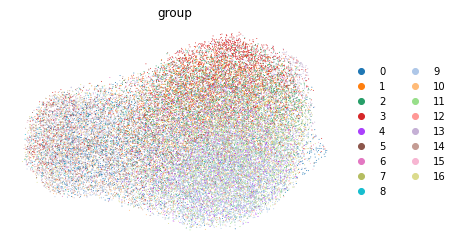

None


/home/krushna/Softwares/Anaconda3/envs/tf2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


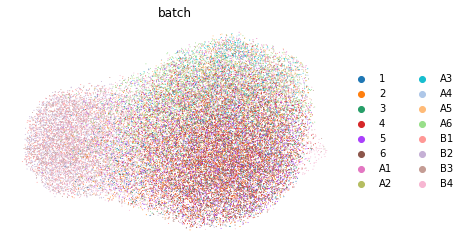

None


/home/krushna/Softwares/Anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computing NMI ...
Done !
NMI = 0.11469196454809373
Epoch : [1] ,  a_loss = 325.0209, d_loss: -0.0499 , db_loss: 2.3153
iteration 15, obtained number of clusters 17


AttributeError: 'scDREAMER' object has no attribute 'lables_enc'

In [6]:

import model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 6,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        N_celltype_exp = N_celltype_exp_dic[name],
        name = name,
        step1_epochs = 2,
        )


    dreamer.train_cluster()
    